# Module 6, Activity 2: Drawing Polygons

In this activity, we're going to learn how to draw polygons. Polygons are just spatially explicit shapes. We've already worked with polygons in the last activity - the urban areas, land masses and national boundaries in our global map were all examples of polygons. But, what if we wanted to add additional spatial shapes to our existing visualisation? That's what we'll focus on here. Shapefiles come in two main formats - a single csv or several files that each give the required information about the shapes we're visualising. We'll start with the latter format. We'll be using [**geopandas**](https://geopandas.org/en/stable/) to access and open spatial datasets, and [**cartopy**](https://scitools.org.uk/cartopy/docs/latest/) to plot them. Let's get started by loading our packages.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Importing and visualising shapefiles

To set the scene, let's create a map of Australia's Great Barrier Reef, off the coast of Queensland.

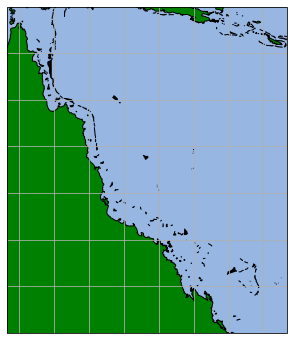

In [2]:
## Pull finest resolution reef feature from Natural Earth
reefs = cfeature.NaturalEarthFeature(category = 'physical',
                                          name = 'reefs', 
                                          scale = '10m') 

land = cfeature.NaturalEarthFeature(category = 'physical',
                                       name = 'land',
                                       scale = '10m')


crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(land, edgecolor = "black", facecolor = "green") # Add land
ax.add_feature(cfeature.OCEAN) # Add oceans
ax.add_feature(reefs, edgecolor="black", facecolor = "black") # Add reefs
ax.gridlines() # inbuilt function to add gridlines

ax.set_extent([142, # Longitude lower bound (degrees east)
               154, # Longitude upper bound (degrees east)
               -24, # Latitude lower bound (degrees north)
               -10]) # Latitude upper bound (degrees north)

# Plot
plt.show()

The Great Barrier Reef is a multiple-use area, split into nine zones (see [here](https://www.gbrmpa.gov.au/access-and-use/zoning) for more information). One of those zones covers the Marine National Parks on the Reef. Within the parks, all extractive activity such as fishing or coral harvesting is prohibited. We've downloaded shapefiles from the [Queensland Spatial Catalogue](https://qldspatial.information.qld.gov.au/catalogue/custom/index.page) that have the spatial data for the nine zones across the Great Barrier Reef. Let's open the files with **geopandas** and see what it looks like.

In [3]:
gbr_zones = gpd.read_file("data/GBR_Marine_Park_Zoning/")
gbr_zones

,FEATURE,MARINEPARK,MANAGEMENT,ZONE_ID,LOCATION,IUCN_CODE,ZONE,AREA_SQ_KM,SHAPE_Leng,SHAPE_Area,geometry
0,sea and estuary,Great Barrier Reef Coast Marine Park,Cairns/Cooktown,EPA zoning,Ellie Point,IV,General Use Zone,13.246014,0.195166,0.001123,"POLYGON ((145.76705 -16.86403, 145.76766 -16.8..."
1,sea and estuary,Great Barrier Reef Coast Marine Park,Cairns/Cooktown,EPA zoning,Trinity Inlet,II,Estuarine Conservation Zone,15.162821,0.210782,0.001286,"POLYGON ((145.81305 -16.86806, 145.84744 -16.8..."
2,sea,Great Barrier Reef Coast Marine Park,Outer Islands (cn),GU-16-6004,Sudbury Reef,IV,General Use Zone,28.686576,0.205423,0.002433,"POLYGON ((146.15990 -16.90106, 146.15988 -16.9..."
3,sea and estuary,Great Barrier Reef Coast Marine Park,Cairns/Cooktown,EPA zoning,Trinity Inlet,II,Estuarine Conservation Zone,0.027061,0.022565,0.000002,"POLYGON ((145.81839 -16.90154, 145.82091 -16.9..."
4,sea,Great Barrier Reef Coast Marine Park,Outer Islands (cn),HP-16-5129,Sudbury Reef,IV,Habitat Protection Zone,64.074832,0.324330,0.005436,"POLYGON ((146.18355 -16.91188, 146.18355 -16.9..."
...,...,...,...,...,...,...,...,...,...,...,...
2480,island/cay,void,void,n/a,Far North Queensland,None,None,0.021071,0.005833,0.000002,"POLYGON ((142.59685 -10.70569, 142.59658 -10.7..."
2481,island/cay,void,void,n/a,Far North Queensland,None,None,0.079002,0.010070,0.000007,"POLYGON ((142.59833 -10.71067, 142.59737 -10.7..."
2482,island/cay,void,void,n/a,Far North Queensland,None,None,0.158342,0.016002,0.000013,"POLYGON ((142.55931 -10.71147, 142.55859 -10.7..."
2483,island/cay,void,void,n/a,Far North Queensland,None,None,0.024905,0.005293,0.000002,"POLYGON ((142.68201 -10.71152, 142.68109 -10.7..."


Note how we've opened these shapefiles: in the **read_file** function, we didn't call a specific file, we called a *folder* with many files. Whenever you download shapefiles, they come as a folder (usually a zipfile that you need to decompress) with multiple files. Each file in the folder contains spatial information, which **read_file** knits together into a [GeoDataFrame](https://geopandas.org/en/stable/getting_started/introduction.html#Concepts). If you're interested, you can read more about shapefiles [here](https://en.wikipedia.org/wiki/Shapefile).

This GeoDataFrame looks like data frames we've seen before, but notice that the far right column has geometric information for each entry. Here, the geometric information is polygons. This is the column we call with **ax.geometries** to add the polygons to our map:

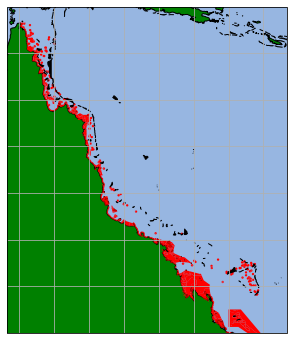

In [4]:
## Pull finest resolution reef feature from Natural Earth
reefs = cfeature.NaturalEarthFeature(category = 'physical',
                                          name = 'reefs', 
                                          scale = '10m') 

land = cfeature.NaturalEarthFeature(category = 'physical',
                                       name = 'land',
                                       scale = '10m')

crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(land, edgecolor = "black", facecolor = "green") # Add land
ax.add_feature(cfeature.OCEAN) # Add oceans

ax.add_geometries(gbr_zones.geometry, crs = crss, facecolor = "red") # Add GBR zones, make their face colour red

ax.add_feature(reefs, edgecolor="black", facecolor = "black") # Add reefs
ax.gridlines() # inbuilt function to add gridlines

ax.set_extent([142, # Longitude lower bound (degrees east)
               154, # Longitude upper bound (degrees east)
               -24, # Latitude lower bound (degrees north)
               -10]) # Latitude upper bound (degrees north)

# Plot
plt.show()

For this next bit, let's zoom into the [Mackay/Capricorn Region](https://www.dcceew.gov.au/sites/default/files/env/pages/e166e5b7-bd7f-4bc5-9807-ba263e248632/files/gbr-reference-map.pdf). Notice in the figure below we've now turned on lat/lon axis labels in the [**ax.gridlines**](https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/gridliner.html) function, since as we zoom in on a smaller area it can be harder to orient ourselves visually. We'll look at adding in point objects like cities, scalebars and a North Arrow in the upcoming activities in this Module, since those features also make a map much easier to read as we focus on a smaller area.

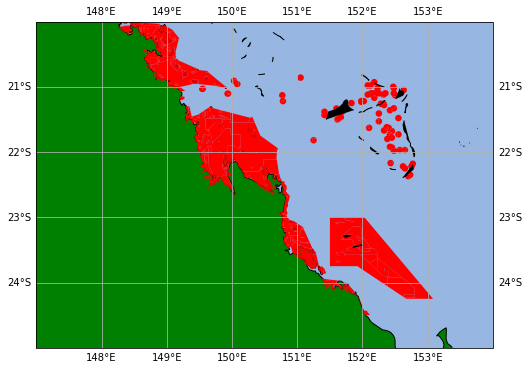

In [5]:
## Pull finest resolution reef feature from Natural Earth
reefs = cfeature.NaturalEarthFeature(category = 'physical',
                                          name = 'reefs', 
                                          scale = '10m') 

land = cfeature.NaturalEarthFeature(category = 'physical',
                                       name = 'land',
                                       scale = '10m')


crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(land, edgecolor = "black", facecolor = "green") # Add land
ax.add_feature(cfeature.OCEAN) # Add oceans

ax.add_geometries(gbr_zones.geometry, crs = crss, facecolor = "red") # Add GBR zones, make their face colour red

ax.add_feature(reefs, edgecolor="black", facecolor = "black") # Add reefs

ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

ax.set_extent([147, # Longitude lower bound (degrees east)
               154, # Longitude upper bound (degrees east)
               -25, # Latitude lower bound (degrees north)
               -20]) # Latitude upper bound (degrees north)

# Plot
plt.show()

There are nine management zones on the Great Barrier Reef. In our dataset, they're stored in the ZONE column. Let's have a quick look at them.

In [6]:
gbr_zones.ZONE.unique()

array(['General Use Zone', 'Estuarine Conservation Zone',
       'Habitat Protection Zone', 'Marine National Park Zone',
       'Conservation Park Zone', 'Scientific Research Zone', None,
       'Buffer Zone', 'Preservation Zone'], dtype=object)

What if we wanted to highlight the Marine National Park Zone in the Mackay/Capricorn region? We could do this by colouring that Zone with a distinct colour to the other 8 Zones. First, we'll plot all the Zones with a grey facecolour, then we'll overlay with just the Marine National Park Zone and give it a red facecolour.

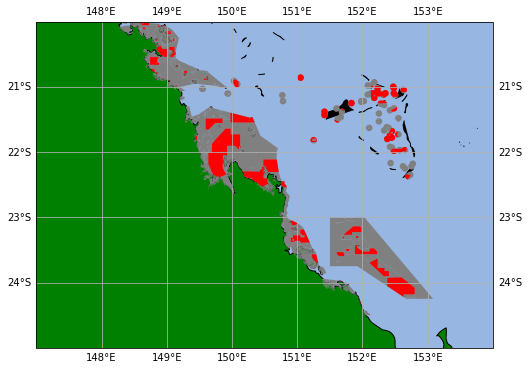

In [6]:
## Pull finest resolution reef feature from Natural Earth
reefs = cfeature.NaturalEarthFeature(category = 'physical',
                                          name = 'reefs', 
                                          scale = '10m') 

land = cfeature.NaturalEarthFeature(category = 'physical',
                                       name = 'land',
                                       scale = '10m')


crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(land, edgecolor = "black", facecolor = "green") # Add land
ax.add_feature(cfeature.OCEAN) # Add oceans
ax.add_feature(reefs, edgecolor="black", facecolor = "black") # Add reefs

## Add all GBR zones, but with a grey facecolour.
ax.add_geometries(gbr_zones.geometry, crs = ccrs.PlateCarree(), facecolor = "gray")

mpa_zone = gbr_zones[gbr_zones['ZONE'] == "Marine National Park Zone"]

## Plot mpa_zone geometries, with a red facecolour - these are part of the Marine National Park Zone. 
ax.add_geometries(mpa_zone.geometry, crs = ccrs.PlateCarree(), facecolor = "red")

ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

ax.set_extent([147, # Longitude lower bound (degrees east)
               154, # Longitude upper bound (degrees east)
               -25, # Latitude lower bound (degrees north)
               -20]) # Latitude upper bound (degrees north)

# Plot
plt.show()

**Exercise:** Notice in the figure above that the coastline and some reefs are obscured by the grey and red Zone polygons. Rearrange the order in which you call features and geometries in the code above to remedy this.

As we start to add more attributes like colours to our maps, we'll need to include a legend so our audience can decode our visualisation. Don't worry about that yet though - we'll learn how to add legends to spatial visualisations in a later activity this Module.

The reef features from the Natural Earth Features site are okay for large-scale analysis, but they're quite coarse. So, we'll see they're missing finer details that become more important as our map extent gets smaller. The Great Barrier Reef Marine Park Authority (GBRMPA) has a shapefile of fine-scale polygons covering all 3,637 reefs we can use instead, available [here](https://geoportal.gbrmpa.gov.au/). Let's load them, then replace the Natural Earth reefs with GBRMPA's.

In [7]:
gbr_bio = gpd.read_file("data/GBR_Bioregions/")
gbr_bio

,OBJECTID,BIOREGION,SUB_REEF,SUBREEFBIO,SUBREEFLAB,DESCRIP,LOC_NAME,SHAPE_Leng,SHAPE_Area,geometry
0,1,35.0,C,78.0,RSW-M_C,Swains Mid Reefs,RSW-M Swains Mid Reefs,0.072343,0.000235,"POLYGON ((152.51489 -22.04951, 152.51596 -22.0..."
1,2,35.0,C,78.0,RSW-M_C,Swains Mid Reefs,RSW-M Swains Mid Reefs,0.109756,0.000680,"POLYGON ((152.66633 -22.08223, 152.66624 -22.0..."
2,3,35.0,C,78.0,RSW-M_C,Swains Mid Reefs,RSW-M Swains Mid Reefs,0.091652,0.000230,"POLYGON ((152.49294 -22.04667, 152.49267 -22.0..."
3,4,39.0,C,66.0,RHE_C,Strong Tidal Mid Shelf Reefs (East),RHE Strong Tidal Mid Shelf Reefs (East),0.031369,0.000077,"POLYGON ((152.07620 -22.03755, 152.07522 -22.0..."
4,5,18.0,C,43.0,RE5_C,High Tidal Fringing Reefs,RE5 High Tidal Fringing Reefs,0.036400,0.000046,"POLYGON ((150.65088 -22.02539, 150.65282 -22.0..."
...,...,...,...,...,...,...,...,...,...,...
3633,3634,7.0,A,16.0,RB1_A,Far Northern Outer Mid Shelf Reefs,RB1 Far Northern Outer Mid Shelf Reefs,0.048714,0.000131,"POLYGON ((143.75515 -11.48160, 143.75584 -11.4..."
3634,3635,14.0,A,30.0,RE1_A,Coastal Far Northern Reefs,RE1 Coastal Far Northern Reefs,0.008405,0.000004,"POLYGON ((142.82987 -11.29139, 142.82954 -11.2..."
3635,3636,2.0,None,3.0,RA1,Deltaic Reefs,RA1 Deltaic Reefs,0.007896,0.000004,"POLYGON ((144.01860 -11.28723, 144.01851 -11.2..."
3636,3637,13.0,A,28.0,RD_A,Far Northern Open Lagoon Reefs,RD Far Northern Open Lagoon Reefs,0.027589,0.000045,"POLYGON ((143.04805 -11.29158, 143.04633 -11.2..."


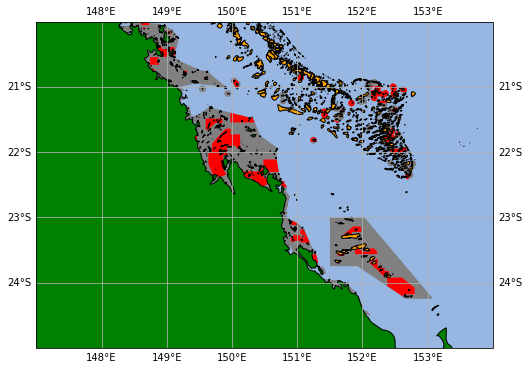

In [8]:
## Pull finest resolution reef feature from Natural Earth
land = cfeature.NaturalEarthFeature(category = 'physical',
                                       name = 'land',
                                       scale = '10m')


crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.OCEAN) # Add oceans

## Add all GBR zones, but with a grey facecolour.
ax.add_geometries(gbr_zones.geometry, crs = crss, facecolor = "gray")

## Plot mpa_zone geometries, with a red facecolour - these are part of the Marine National Park Zone. 
mpa_zone = gbr_zones[gbr_zones['ZONE'] == "Marine National Park Zone"]
ax.add_geometries(mpa_zone.geometry, crs = crss, facecolor = "red")


# Add new reef data
ax.add_geometries(gbr_bio.geometry, crs = crss, edgecolor="black", facecolor = "orange") 


ax.add_feature(land, edgecolor = "black", facecolor = "green") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

ax.set_extent([147, # Longitude lower bound (degrees east)
               154, # Longitude upper bound (degrees east)
               -25, # Latitude lower bound (degrees north)
               -20]) # Latitude upper bound (degrees north)

# Plot
plt.show()



Much better! Now we can zoom in even further. Let's do that, focussing only on the Swains Reef cluster. Let's plot only the Swains cluster, but keep our current map extent.

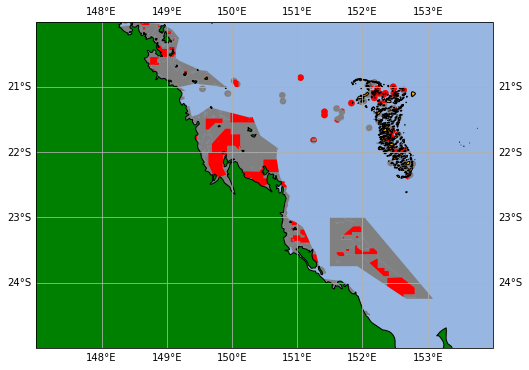

In [10]:
## Pull finest resolution reef feature from Natural Earth
land = cfeature.NaturalEarthFeature(category = 'physical',
                                       name = 'land',
                                       scale = '10m')


crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_feature(cfeature.OCEAN) # Add oceans

## Add all GBR zones, but with a grey facecolour.
ax.add_geometries(gbr_zones.geometry, crs = crss, facecolor = "gray")

## Plot mpa_zone geometries, with a red facecolour - these are part of the Marine National Park Zone. 
mpa_zone = gbr_zones[gbr_zones['ZONE'] == "Marine National Park Zone"]
ax.add_geometries(mpa_zone.geometry, crs = crss, facecolor = "red")


# Find Swains Reef cluster and plot its geometries
swains_bio = gbr_bio.loc[gbr_bio['DESCRIP'].str.contains("Swains")]
ax.add_geometries(swains_bio.geometry, crs = crss, edgecolor="black", facecolor = "orange") 


ax.add_feature(land, edgecolor = "black", facecolor = "green") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

ax.set_extent([147, # Longitude lower bound (degrees east)
               154, # Longitude upper bound (degrees east)
               -25, # Latitude lower bound (degrees north)
               -20]) # Latitude upper bound (degrees north)

# Plot
plt.show()

**Exercise:** Above, we used the [**str.contains**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html) function to pull out all reefs that included the word 'Swains' in their description. Experiment with this search function, and comment your code to explain in your own words what the function is doing.

Now, let's zoom in on the Swains Reef cluster. We can do this by hand, or we can use the [**total.bounds**](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html) function to do this for us:

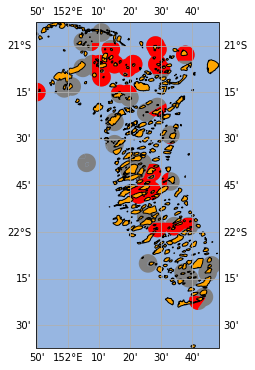

In [11]:
## Pull finest resolution reef feature from Natural Earth
land = cfeature.NaturalEarthFeature(category = 'physical',
                                       name = 'land',
                                       scale = '10m')


plt.figure(figsize=(12, 6))
ax=plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN) # Add oceans

## Add all GBR zones, but with a grey facecolour.
ax.add_geometries(gbr_zones.geometry, crs = ccrs.PlateCarree(), facecolor = "gray")

## Plot mpa_zone geometries, with a red facecolour - these are part of the Marine National Park Zone. 
mpa_zone = gbr_zones[gbr_zones['ZONE'] == "Marine National Park Zone"]
ax.add_geometries(mpa_zone.geometry, crs = ccrs.PlateCarree(), facecolor = "red")


# Find Swains Reef cluster and plot its geometries
swains_bio = gbr_bio[gbr_bio['DESCRIP'].str.contains("Swains")]
ax.add_geometries(swains_bio.geometry, crs = ccrs.PlateCarree(), edgecolor="black", facecolor = "orange") 

ax.add_feature(land, edgecolor = "black", facecolor = "green") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines

min_lon, min_lat, max_lon, max_lat = swains_bio.geometry.total_bounds

ax.set_extent([min_lon, # Longitude lower bound (degrees east)
               max_lon, # Longitude upper bound (degrees east)
               min_lat, # Latitude lower bound (degrees north)
               max_lat]) # Latitude upper bound (degrees north)

# Plot
plt.show()

**Exercises:** 
1) Find the line where we've used the **total.bounds** function. Comment the line in your own words, explaining what it is doing.\
2) In our code for the Swains Reef cluster above, are there any features we can now cut (is there anything we're plotting that isn't visible in our map extent)?\
3) Experiment with the code by selecting and zooming in on different Reef clusters.\
4) The **total.bounds** function set our map extent for us, but it's a little tight - there's no padding around the Swains Reef cluster, which means reefs on the edge of the extent look cut off (even though they aren't). See if you can automatically set some additional padding around the **total.bounds** extent, which scales with the dimensions (extent) of your visualisation. HINT: Try adding/subtracting lon_pad and lat_pad to your maximum and minimum longitudes and latitudes:

**lon_pad = 0.1 * (max_lon - min_lon)**\
**lat_pad = 0.1 * (max_lat - min_lat)**

## Importing and visualising spatial data with CSVs

We can also access spatial data that's stored in a csv. However, we need to do a bit of work to convert the resulting Pandas DataFrame to a GeoDataFrame we can plot with.

Let's try an example, using data from the [City of New York](https://opendata.cityofnewyork.us/).

In [11]:
# Import csv
taxi_zones = pd.read_csv("data/taxi_zones.csv")
taxi_zones.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


This looks very similar to what we get when we access spatial data files using **geopandas**. But, Python doesn't yet read this data frame as spatial data but as a Pandas DataFrame - it's all just text, objects and numbers. For instance, the geometry column **the_geom** above is in well-known text (wkt) format (read more about wkt format [here](http://wiki.gis.com/wiki/index.php/Well-known_text)). So, to plot this data using **cartopy**, we need to convert this data frame to a [GeoDataFrame](http://wiki.gis.com/wiki/index.php/Well-known_text). To do that, we need to tell Python what variable is our spatial data (geometry) and then alocate a CRS to the data frame.

In [12]:
# Convert pandas data frame to a geometric data frame
taxi_zones['geometry'] = gpd.GeoSeries.from_wkt(taxi_zones['the_geom']) # special function to create geometric objects (in this case, polygons) from wkt format lat/lons
taxi_gdf = gpd.GeoDataFrame(taxi_zones,geometry='geometry', crs = "EPSG:4326") # set CRS to WGS84 for future use

Above, we've set the CRS for our taxis spatial data frame to **EPSG:4326**. Feel free to Google what "EPSG" is, and some common codes. But, all we need to know is the EPSG:4326 is a standard CRS and one of the most widely used (read more [here](https://en.wikipedia.org/wiki/World_Geodetic_System)). If we want to change our data's projection to something else, we can use the **to_crs** function. Let's do that below, changing to the Mercator projection. Note that, since we're looking at a relatively small area (greater New York City), we won't really see much difference between different projections.

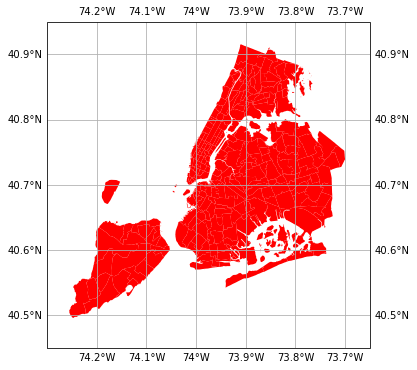

In [13]:
# To plot with cartoply, we need to transform our data into a projected CRS
crs = ccrs.Mercator() # Define the prj crs we want to use
taxi_gdf = taxi_gdf.to_crs(crs.proj4_init) # Transform the data (.proj4_init returns the crs from cartopy in a special format)

# Plot
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crs)
ax.gridlines(draw_labels=True)
ax.add_geometries(taxi_gdf.geometry,crs=crs, facecolor = "red")

ax.set_extent([-74.3,-73.65,40.45,40.95])

**Exercise:** Using Natural Earth, add surrounding land to the New York spatial map, with 10m resolution.